In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Load file
dataframe = pd.read_csv("data.csv", delimiter=";")

print(f"We got {len(dataframe)} rows and {len(dataframe.columns)} columns")

We got 181 rows and 52 columns


In [3]:
#Extract Data
features = dataframe.iloc[:, [2,4,6,8,10,12,14,16,18,20,21,23,24,26,28,30,32,33,35,36,37,38,41,42]]
target = dataframe.iloc[:, [43]]

#Treat string data as NaN
pd.options.mode.chained_assignment = None
for col in features:
    features[col]=pd.to_numeric(features[col], errors='coerce')

#Replace NaN by 0, except for SG where it will be 1
features.iloc[:, [22]] = features.iloc[:, [22]].fillna(1)
features = features.fillna(0)
features

,GB (p/µL),GR (p/µL),Cellule épithéliales (p/µL),Cellules non-épithéliales (p/µL),Levures (p/µL),Bactéries (p/ µL),Cylindres hyalins (p/µL),Cylindres pathologiques (p/µL),Cristaux (p/µL),ERY 560,...,KET,GLU réfl,"Glucose ur, chaines",PRO réfl,"Protéines ur, chaines (mg/L)",PH 560,PH 615,PH,SG,CRP
0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,64.41,...,51.85,70.12,2.00,64.38,485.0,33.87,68.07,6.0,1.012,0.00
1,900.00,15.84,2.20,0.00,0.00,40.04,0.0,0.00,0.00,19.18,...,54.41,69.66,5.00,60.91,93.0,34.13,67.59,6.0,1.022,0.00
2,629.64,429.44,3.08,9.68,0.00,41.36,0.0,0.00,0.00,12.65,...,52.29,72.14,0.00,57.17,120.0,13.72,9.31,9.0,1.015,40.85
3,0.00,4.40,1.76,0.00,0.00,47.96,0.0,0.00,0.00,65.76,...,55.07,72.65,1.00,65.90,21.0,35.38,33.27,7.0,1.004,1.18
4,91.74,7.04,7.92,1.76,0.44,64.24,0.0,0.00,0.00,54.43,...,48.03,68.66,9.00,59.06,185.0,34.14,68.37,6.0,1.022,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,900.00,1800.00,0.00,0.00,0.00,2904.00,0.0,14.70,0.00,10.01,...,51.95,67.17,3.00,50.65,318.0,37.49,63.65,6.0,1.019,18.92
177,91.38,1663.20,0.00,0.51,1.02,434.58,0.0,14.72,21.32,14.37,...,51.97,71.11,5.57,54.92,663.0,29.21,68.01,5.0,1.016,118.00
178,495.00,452.60,18.90,0.00,0.00,3997.70,0.0,18.90,0.00,15.57,...,54.51,68.75,3.00,41.22,670.0,38.54,37.18,7.0,1.018,16.99
179,257.40,1047.20,0.00,0.00,0.00,1839.20,0.0,26.40,1025.20,10.20,...,47.05,68.93,5.00,58.73,230.0,16.96,12.04,8.0,1.013,125.77


In [4]:
#Problem space has >10 dimensions, we fall into https://en.wikipedia.org/wiki/Curse_of_dimensionality. 
#Let's find the most relevant dimension using PCA

#We first need to normalize the data
x = StandardScaler().fit_transform(features.values)
y = target.values

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, target], axis = 1)



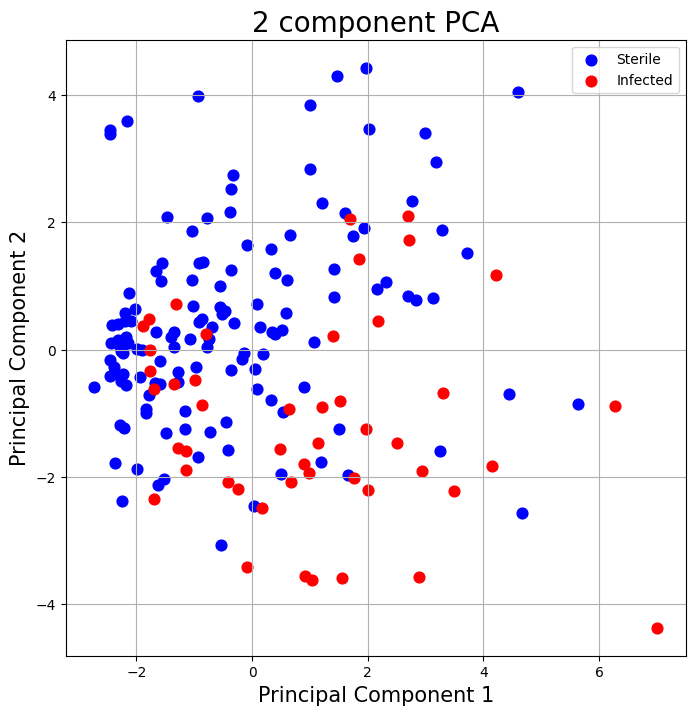

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

cond = finalDf.iloc[:,-1:] == 0
cond = cond.squeeze()
subset_a = finalDf[cond.squeeze()]
subset_b = finalDf[~cond]
plt.scatter(subset_a['principal component 1'], subset_a['principal component 2'], s=60, c='b', label='Sterile')
plt.scatter(subset_b['principal component 1'], subset_b['principal component 2'], s=60, c='r', label='Infected') 
ax.legend()
ax.grid()